First few rows of the dataset:
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_r

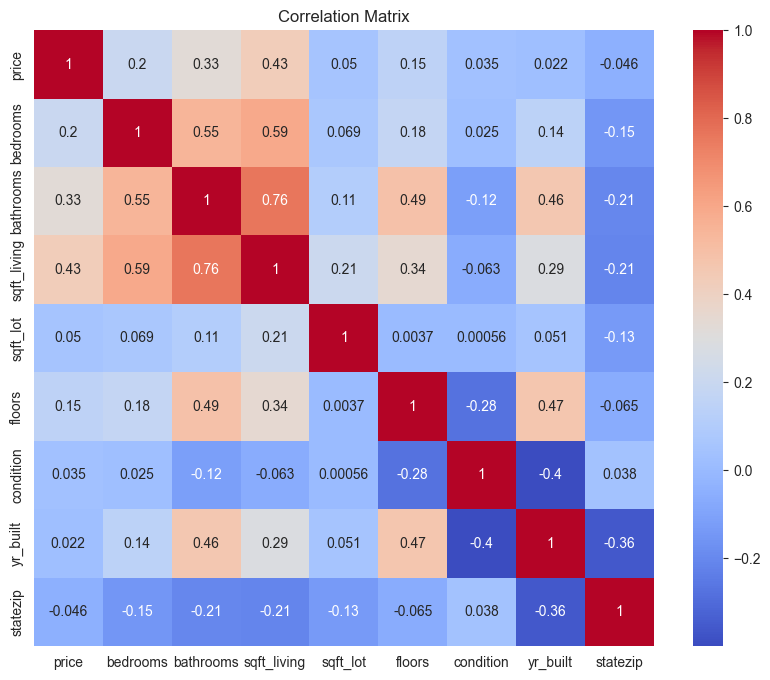

Mean Squared Error: 1010835134074.22
R-squared: 0.01


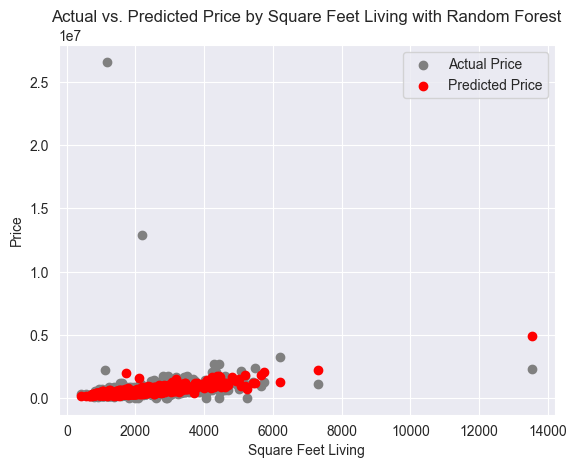

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('data.csv')  

print("First few rows of the dataset:")
print(df.head())

# Drop unnecessary columns and preprocess the data
df.drop(['date', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'street', 'city', 'country'], axis=1, inplace=True)
df['statezip'] = df['statezip'].apply(lambda x: int(x.split(' ')[1]))

# Check for missing values and handle them
print("\nMissing values in each column:")
print(df.isnull().sum())
df.dropna(inplace=True)

print("\nDataFrame info after preprocessing:")
print(df.info())

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Define the features and the target variable
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
X = df[features]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest model
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Make predictions with the Random Forest model
y_pred = forest.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r_squared:.2f}')

# Visualizing the results
plt.scatter(X_test['sqft_living'], y_test, color='gray', label='Actual Price')
plt.scatter(X_test['sqft_living'], y_pred, color='red', label='Predicted Price')
plt.xlabel('Square Feet Living')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price by Square Feet Living with Random Forest')
plt.legend()
plt.show()


In [2]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r_squared:.2f}')

Mean Squared Error: 1010835134074.22
R-squared: 0.01
